# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Haekal Hasan Thaninvdra]
- **Email:** [mc295d5y1802@student.devacademy.id]
- **ID Dicoding:** [MC295D5Y1802]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah total sepeda yang disewa?
- Apakah ada perbedaan dalam penggunaan sepeda sewa pada hari libur dan hari biasa?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('data/day.csv')
print("Data Day:")
df_day.head()

Data Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
#Cek tipe data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
#cek duplikasi
df_day.duplicated().sum()

0

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada kolom yang kosong (Null)
- Tidak ada kolom yang ter duplikasi
- Terdapat kesalahan tipe data pada 'dteday' yang harusnya bertipe date

### Cleaning Data

#### Konversi tipe data untuk kolom "dteday"

In [6]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data 'dteday' sudah berubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

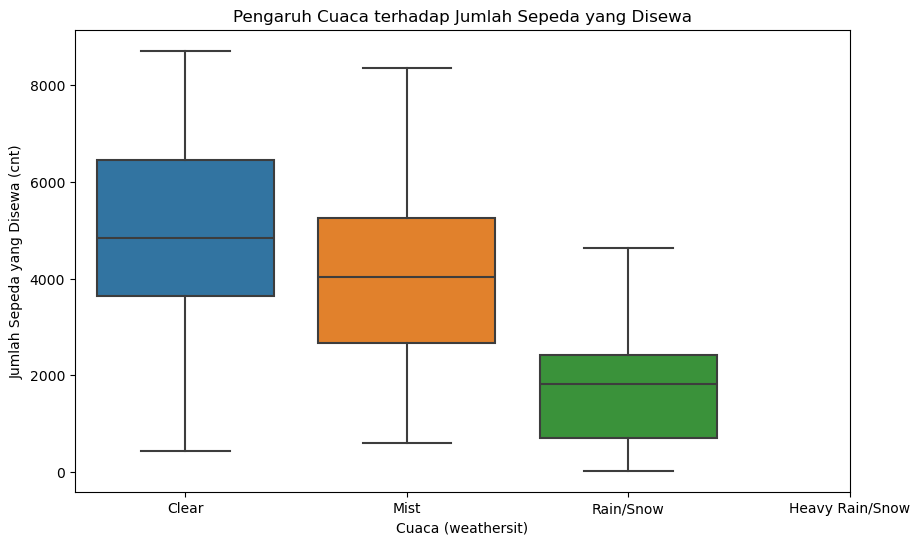

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day, x='weathersit', y='cnt')
plt.title("Pengaruh Cuaca terhadap Jumlah Sepeda yang Disewa")
plt.xlabel("Cuaca (weathersit)")
plt.ylabel("Jumlah Sepeda yang Disewa (cnt)")
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

**Insight:**
- Cuaca Cerah mendapatkan penyewaan terbanyak
- Cuaca Heavy Rain (hujan lebat) tidak terdapat sepeda yang disewa

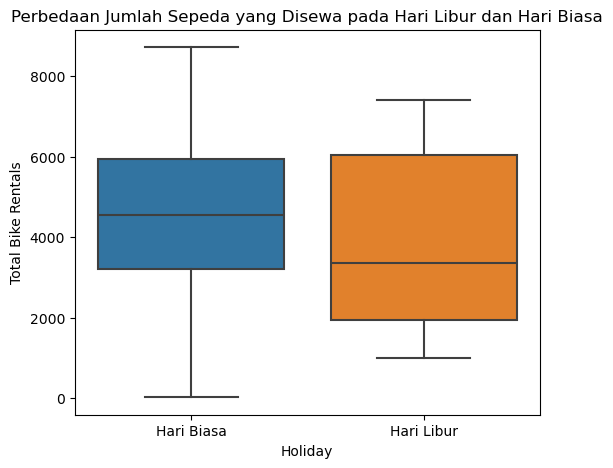

In [8]:
plt.figure(figsize=(6,5))
sns.boxplot(x="holiday", y="cnt", data=df_day)
plt.xlabel("Holiday")
plt.ylabel("Total Bike Rentals")
plt.title("Perbedaan Jumlah Sepeda yang Disewa pada Hari Libur dan Hari Biasa")
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah total sepeda yang disewa?

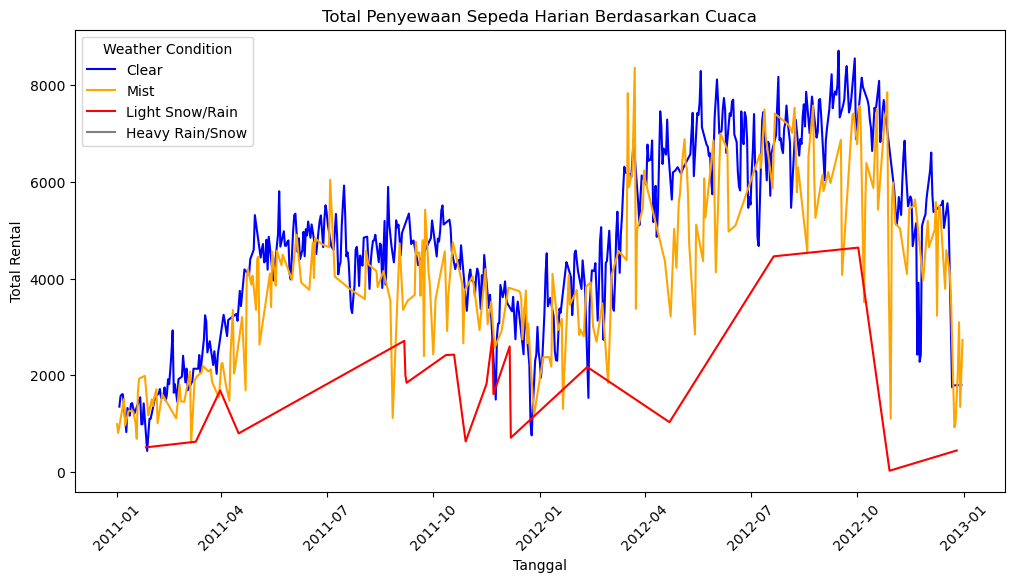

In [9]:
weather_colors = {1: "blue", 2: "orange", 3: "red", 4: "grey"}
weather_labels = {1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}
daily_weather = df_day.groupby(['dteday', 'weathersit'])['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
lines = []
for weather, color in weather_colors.items():
    subset = daily_weather[daily_weather['weathersit'] == weather]
    line, = plt.plot(subset['dteday'], subset['cnt'], label=weather_labels[weather], color=color)
    lines.append(line)
plt.title("Total Penyewaan Sepeda Harian Berdasarkan Cuaca")
plt.xlabel("Tanggal")
plt.ylabel("Total Rental")
plt.xticks(rotation=45)
plt.legend(handles=lines, title="Weather Condition")
plt.show()

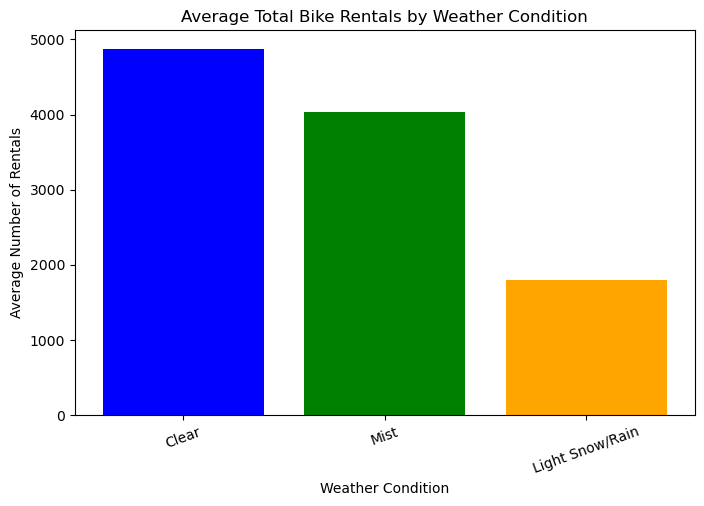

In [10]:
weather_labels = {1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}
weather_data = df_day.groupby("weathersit")["cnt"].mean().reset_index()
weather_data["Weather Condition"] = weather_data["weathersit"].map(weather_labels)
x = np.arange(len(weather_data))
colors = ["blue", "green", "orange", "red"]
plt.figure(figsize=(8, 5))
plt.bar(x, weather_data["cnt"], color=colors)
plt.title("Average Total Bike Rentals by Weather Condition")
plt.ylabel("Average Number of Rentals")
plt.xlabel("Weather Condition")
plt.xticks(x, weather_data["Weather Condition"], rotation=20)
plt.show()

**Insight:**
- Cuaca cerah menunjukkan jumlah penyewaan sepeda yang paling tinggi, yang menggambarkan bahwa orang lebih cenderung menyewa sepeda ketika cuaca mendukung untuk beraktivitas di luar ruangan
- Pada cuaca mendung, meskipun tidak sebanyak cuaca cerah, penyewaan sepeda tetap signifikan. Cuaca mendung mungkin masih memungkinkan orang untuk beraktivitas
- Penyewaan sepeda cenderung turun secara signifikan pada cuaca hujan ringan atau salju/rain. Ini menunjukkan bahwa orang menghindari bersepeda saat cuaca tidak bersahabat
- Pada cuaca hujan lebat atau salju yang ekstrem, jumlah penyewaan hampir nol. Hal ini menunjukkan bahwa kondisi cuaca yang sangat buruk (hujan lebat atau salju tebal) secara drastis mengurangi minat orang untuk menggunakan sepeda sewa

### Pertanyaan 2: Apakah ada perbedaan dalam penggunaan sepeda sewa pada hari libur dan hari biasa?

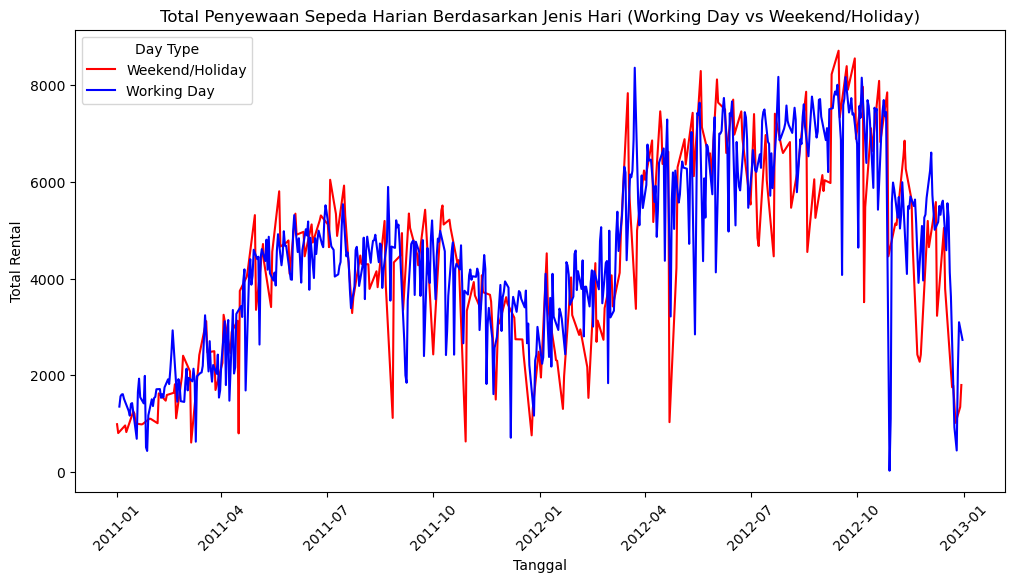

In [11]:
day_colors = {0: "red", 1: "blue"}
day_labels = {0: "Weekend/Holiday", 1: "Working Day"}
daily_day_type = df_day.groupby(['dteday', 'workingday'])['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
lines = []
for day_type, color in day_colors.items():
    subset = daily_day_type[daily_day_type['workingday'] == day_type]
    line, = plt.plot(subset['dteday'], subset['cnt'], label=day_labels[day_type], color=color)
    lines.append(line)
plt.title("Total Penyewaan Sepeda Harian Berdasarkan Jenis Hari (Working Day vs Weekend/Holiday)")
plt.xlabel("Tanggal")
plt.ylabel("Total Rental")
plt.xticks(rotation=45)
plt.legend(handles=lines, title="Day Type")
plt.show()

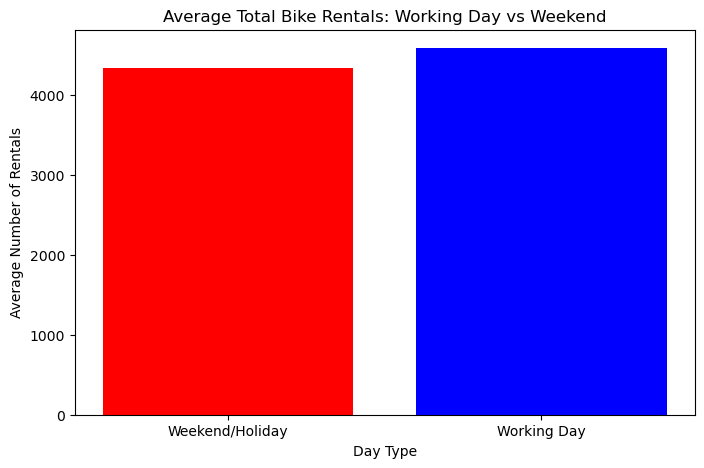

In [12]:
day_labels = {0: "Weekend/Holiday", 1: "Working Day"}
day_data = df_day.groupby("workingday")["cnt"].mean().reset_index()
day_data["Day Type"] = day_data["workingday"].map(day_labels)
x = np.arange(len(day_data))  # Posisi tiap kategori hari
colors = ["red", "blue"]
plt.figure(figsize=(8, 5))
plt.bar(x, day_data["cnt"], color=colors)
plt.title("Average Total Bike Rentals: Working Day vs Weekend")
plt.ylabel("Average Number of Rentals")
plt.xlabel("Day Type")
plt.xticks(x, day_data["Day Type"])
plt.show()

**Insight:**
- Pada hari kerja, jumlah penyewaan sepeda terlihat lebih tinggi dibandingkan dengan weekend/holiday. Ini menunjukkan bahwa sepeda sewa digunakan secara aktif untuk keperluan transportasi sehari-hari, seperti perjalanan menuju tempat kerja atau aktivitas lainnya.
- Meskipun weekend/holiday memiliki jumlah penyewaan yang cukup signifikan, namun hari kerja cenderung sedikit lebih tinggi. Hal ini mungkin mengindikasikan bahwa pada akhir pekan, orang lebih cenderung beristirahat atau memiliki kegiatan lain selain menggunakan sepeda sewa.

## Analisis Lanjutan (Opsional)

## Conclusion

### Conclution pertanyaan 1
- Dari hasil analisis visualisasi data, dapat disimpulkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah terbukti menjadi faktor yang paling mendukung peningkatan jumlah penyewaan sepeda, dengan penyewa lebih cenderung menggunakan sepeda saat kondisi cuaca mendukung aktivitas luar ruangan
### Conclution pertanyaan 2
- Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan weekend/holiday.